<a href="https://colab.research.google.com/github/JonathanLehner/Colab-collection/blob/nsfw/Graphonomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Gaoyiminggithub/Graphonomy

In [0]:
#https://stackoverflow.com/questions/53417976/import-data-from-shared-google-drive-into-google-colaboratory
#Click on the folder and then click on an option that says "Add to My Drive." The shared folder should now be visible in Google Colab.

# connect to google drive, need to copy auth code from new page
from google.colab import drive
# gdrive not working somehow
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# download repo from Github
import os
from os.path import exists, join, basename

project_name = "Graphonomy"
if not exists(project_name):
  # clone
  !git clone -q https://github.com/Gaoyiminggithub/Graphonomy.git

In [0]:
%cd Graphonomy

/content/Graphonomy/Graphonomy


In [0]:
!pip install -r requirements

In [0]:
cihp_path = '/content/gdrive/My Drive/LIP/CIHP'
atr_path = '/content/gdrive/My Drive/LIP/ATR'
cihp_flipped_path = '/content/gdrive/My Drive/Category_rev_ids.rar'
atr_flipped_path = '/content/gdrive/My Drive/SegmentationClassAug_rev.rar'

#pretrained models
pascal_pt = '/content/gdrive/My Drive/cihp2pascal.pth'
cihp_pt = '/content/gdrive/My Drive/inference.pth'
universal_pt = '/content/gdrive/My Drive/universal_trained.pth'
!mkdir /content/Graphonomy/data/pretrained_model
os.system('cp "{0}" /content/Graphonomy/data/pretrained_model/'.format(pascal_pt))
os.system('cp "{0}" /content/Graphonomy/data/pretrained_model/'.format(cihp_pt))
os.system('cp "{0}" /content/Graphonomy/data/pretrained_model/'.format(universal_pt))

!sudo apt-get install unrar
#The datasets (CIHP & ATR) are available at google drive and baidu drive. 
os.system('cp "{0}" /content/Graphonomy/data/datasets/ATR/'.format(atr_path))
os.system('cp "{0}" /content/Graphonomy/data/datasets/CIHP_4w/'.format(cihp_path))

#And you also need to download the label with flipped. 

#Download cihp_flipped, unzip and store in data/datasets/CIHP_4w/.
%cd /content/Graphonomy/data/datasets/CIHP_4w
os.system('cp "{0}" /content/Graphonomy/data/datasets/CIHP_4w/'.format(cihp_flipped_path))
!unrar x Category_rev_ids.rar

#Download atr_flip, unzip and store in data/datasets/ATR/.
%cd /content/Graphonomy/data/datasets/ATR
os.system('cp "{0}" /content/Graphonomy/data/datasets/CIHP_4w/'.format(atr_flipped_path))
!unrar x SegmentationClassAug_rev.rar



mkdir: cannot create directory ‘/content/Graphonomy/data/pretrained_model’: File exists
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.5.8-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/content/Graphonomy/data/datasets/CIHP_4w

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Category_rev_ids.rar


Would you like to replace the existing file Category_rev_ids/0000001.png
  4261 bytes, modified on 2018-10-15 15:49
with a new one
  4261 bytes, modified on 2018-10-15 15:49

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit q

Program aborted
/content/Graphonomy/data/datasets/ATR

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open SegmentationClassAug_rev.rar
No such file or directory


In [0]:
#!cp "/content/gdrive/My Drive/Category_rev_ids.rar" /content/Graphonomy/data/datasets/CIHP_4w/



In [0]:
# load some sample images
%cd /content/Graphonomy/img
#too big
!wget -O 9999.jpg https://cdn-pics.pornhd.com/pornhd/header/category/2_phd_category_big_anal-porn.jpg
#too big
!wget -O 0000.jpg http://badmilfs.net/wp-content/uploads/2016/06/badmilfs-porn.jpg
#works
!wget -O 2008.jpg https://images.nubiles-porn.com/assets/common/images/tubeTourThumbs/147/523/147523/fullSizeCropped_147523.jpg?cacheBust=a0966056

#medium size
!wget -O 1111.jpg http://www.rushporn.com/screen/videos/images/horny-fucker-fucks-sexy-russian-girls-on-hd-quality-group-porn-1502750300.jpg
!wget -O 2222.jpg http://www.rexporn.com/static/tehreesome-squirting-porn.-alexis-fawx-and-her-stepdaughter-brittany-shae.jpg
!wget -O 3333.jpg https://www.vidtubeporn.com/fullimage/beautiful-porn-started-in-the-kitchen-and-continued-in-the-crib_1.jpg
!wget -O 4444.jpg https://www.ps4wallpapers.com/wp-content/uploads/2017/10/PS4Wallpapers.com_59da5795ba269_Beautiful-Naked-Girls-HQ-Wallpapers-20161129-2.jpg
!wget -O 5555.jpg http://cdn.hotnakedgirls.net/2019-03-18/594871_11.jpg
!wget -O 6666.jpg https://www.kindgirls.com/vids/scsmall/angelina-s.jpg
!wget -O 7777.jpg https://previews.123rf.com/images/piksel/piksel1204/piksel120400015/13063145-casual-man-standing.jpg
!wget -O 8888.jpg http://cdn.hotnakedgirls.net/2015-12-30/330251_06.jpg
#upload local file -- file disappears?? upload on the left and move instead
#from google.colab import files
#uploaded = files.upload()
#!mv /content/aten_test.png /content/Graphonomy/img/aten_test.png

%cd /content/Graphonomy

/content/Graphonomy/img
--2019-05-05 13:07:59--  https://cdn-pics.pornhd.com/pornhd/header/category/2_phd_category_big_anal-porn.jpg
Resolving cdn-pics.pornhd.com (cdn-pics.pornhd.com)... 64.210.136.70, 64.210.136.72, 64.210.136.68
Connecting to cdn-pics.pornhd.com (cdn-pics.pornhd.com)|64.210.136.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222592 (217K) [image/jpeg]
Saving to: ‘9999.jpg’

9999.jpg            100%[===================>] 217.38K  --.-KB/s    in 0.08s   

2019-05-05 13:07:59 (2.75 MB/s) - ‘9999.jpg’ saved [222592/222592]

--2019-05-05 13:08:00--  http://badmilfs.net/wp-content/uploads/2016/06/badmilfs-porn.jpg
Resolving badmilfs.net (badmilfs.net)... 5.149.248.193
Connecting to badmilfs.net (badmilfs.net)|5.149.248.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414272 (405K) [image/jpeg]
Saving to: ‘0000.jpg’

0000.jpg            100%[===================>] 404.56K   487KB/s    in 0.8s    

2019-05-05 13:08:01 

In [0]:
# resize images or the program cannot deal with them
# https://stackoverflow.com/questions/10607468/how-to-reduce-the-image-file-size-using-pil
for image_name in ["4444.jpg","9999.jpg","0000.jpg"]:
  from PIL import Image
  foo = Image.open("/content/Graphonomy/img/{0}".format(image_name))
  print(foo)
  foo = foo.resize((480,270),Image.ANTIALIAS)
  foo.save("/content/Graphonomy/img/{0}".format(image_name),optimize=True,quality=95)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x7FA9BA612AC8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x7FA9BAF19128>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2000x1125 at 0x7FA9BA66EE80>


In [0]:
import torch
torch.cuda.empty_cache() #doesn't seem to make a difference

num_images = 10
for i in range(0, num_images):
  print(i)
  image_name = "{0}{0}{0}{0}.jpg".format(i)
  # We provide a simply script to get the visualization result on the CIHP dataset using trained models as follows :
  # Example of inference
  %cd /content/Graphonomy

  command_string = 'python exp/inference/inference.py  \
  --loadmodel ./data/pretrained_model/inference.pth \
  --img_path "./img/{0}" \
  --output_path ./img/ \
  --output_name "/{0}_test"'.format(image_name)

  import subprocess
  import shlex
  args = shlex.split(command_string)
  print(args)
  process = subprocess.Popen(args, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, bufsize=1)
  #inspiration from https://www.endpoint.com/blog/2015/01/28/getting-realtime-output-using-python
  while True:
      output = process.stdout.readline()
      if process.poll() is not None:
          break
      if output != b'':
          print(output)
      rc = process.poll()



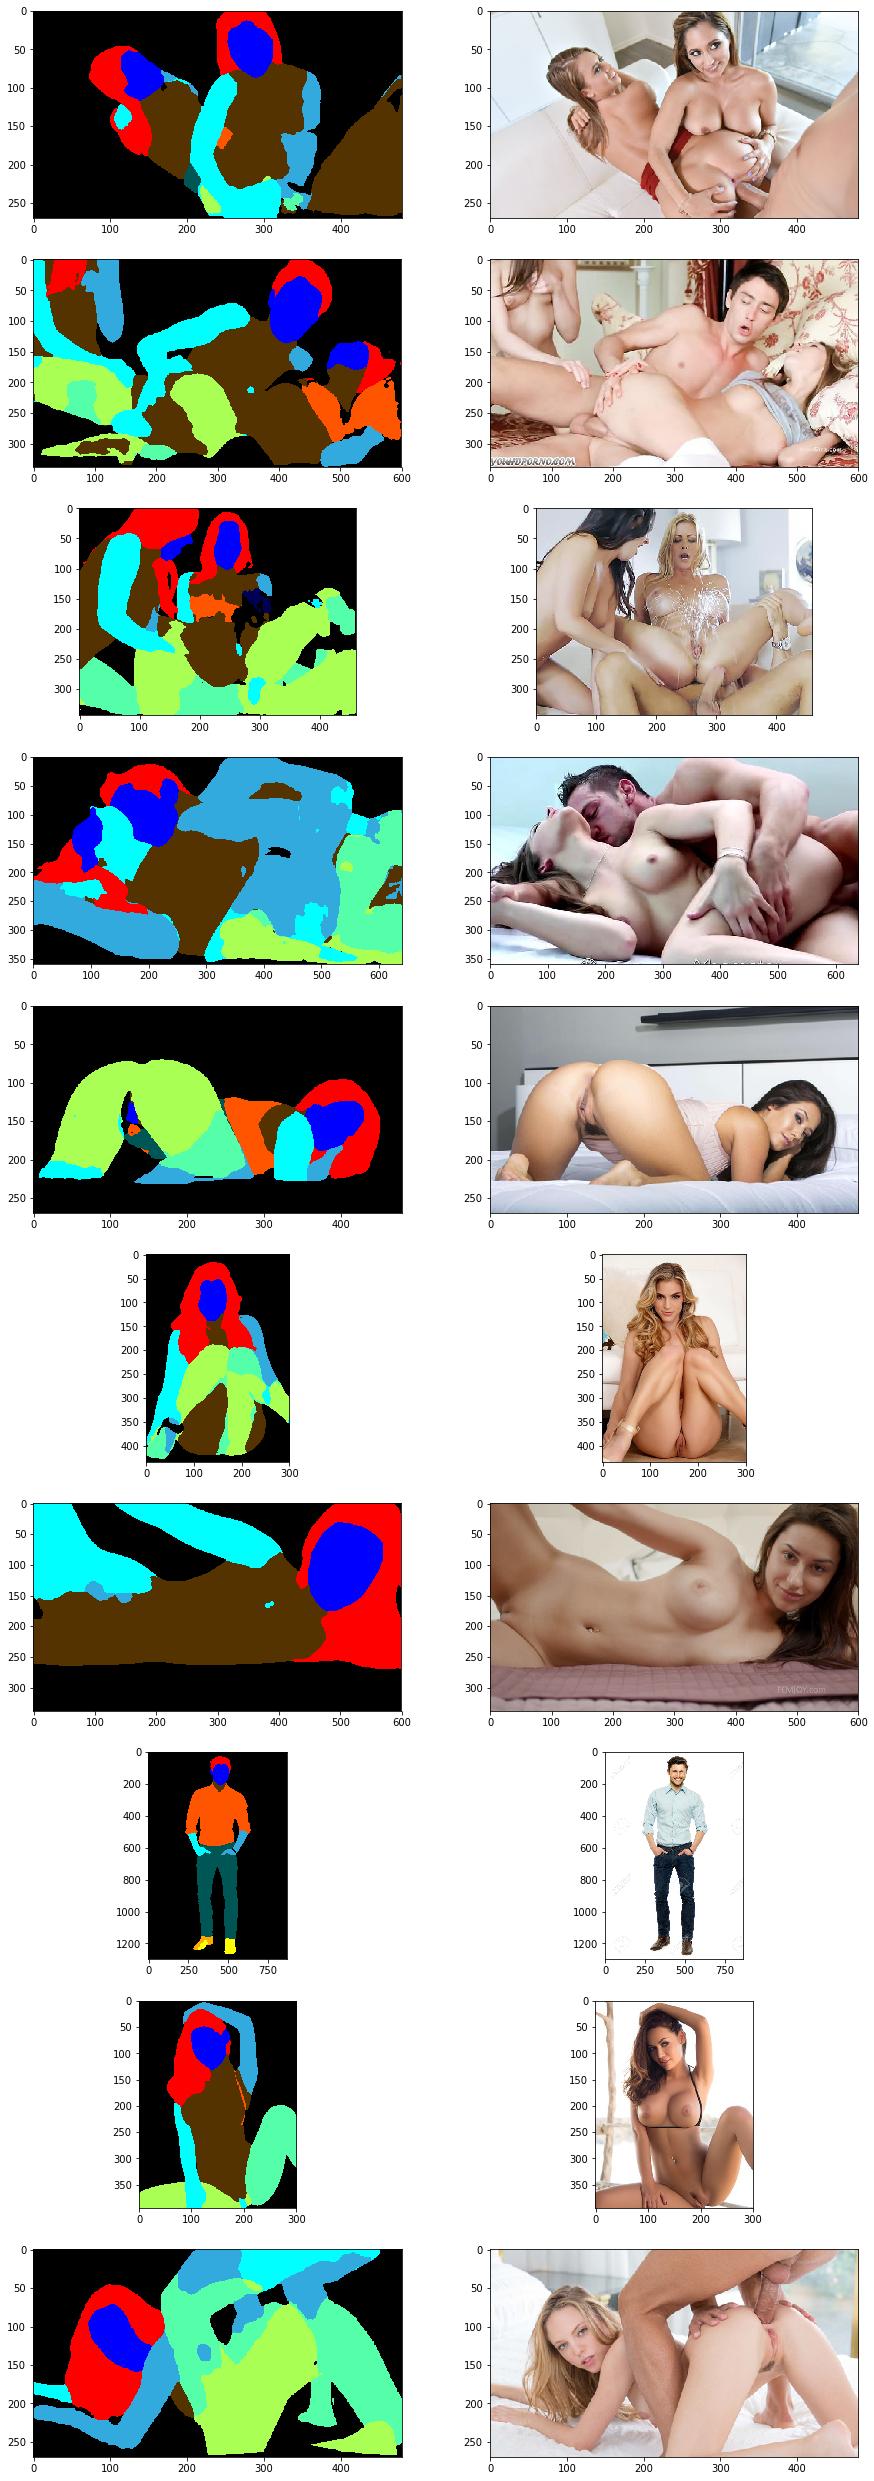

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.figure(figsize=(15,45)) 
for i in range(0, num_images):
  image_name = "{0}{0}{0}{0}.jpg".format(i)
  
  #https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
  plt.subplot(num_images, 2, (i+1)*2-1)
  img=mpimg.imread("/content/Graphonomy/img/{0}_test.png".format(image_name))
  imgplot = plt.imshow(img)

  plt.subplot(num_images, 2, (i+1)*2)
  img=mpimg.imread("/content/Graphonomy/img/{0}".format(image_name))
  imgplot = plt.imshow(img)

plt.savefig('segmentations.png') #saved in graphonomy folder



In [0]:
!ps
!kill 8644

    PID TTY          TIME CMD
      1 ?        00:00:00 run.sh
     11 ?        00:00:00 node
     32 ?        00:00:02 node
     42 ?        00:00:04 jupyter-noteboo
    130 ?        00:00:00 tail
    139 ?        00:00:10 python3
    175 ?        00:00:00 drive
    246 ?        00:00:08 drive
    307 ?        00:00:00 tail
    308 ?        00:00:00 grep
    683 ?        00:00:00 ps
/bin/bash: line 0: kill: (8644) - No such process
